#### Section - A

In this project you will apply bagging to implement an ensemble learning approach for 
solving a (binary) classification problem. The training data set is given in Fig 3.36 (the 
table labeled “Training”) on page 189 of the textbook (2nd edition). The base classifier 
will be a decision tree. 
Determine the number of base classifiers (or bagging rounds) and show the result of 
each round (the records chosen at each round and the model (tree) obtained at each 
round). 
What is the result of running your ensemble classifier on the data set given in the 
second table (labeled “Validation”) in Fig 3.36 on page 189 of the textbook? 

In [2]:
import pandas as pd
import numpy as np

#### Section - A : 1. Load datasets

In [3]:
training_dataset_df = pd.read_csv("dataset_training_table_3.36.csv", usecols=["A", "B", "C", "Class"])
training_dataset_df

,A,B,C,Class
0,0,0,0,+
1,0,0,1,+
2,0,1,0,+
3,0,1,1,-
4,1,0,0,+
5,1,0,0,+
6,1,1,0,-
7,1,0,1,+
8,1,1,0,-
9,1,1,0,-


In [4]:
validation_dataset_df = pd.read_csv("dataset_validation_table_3.36.csv", usecols=["A", "B", "C", "Class"])
validation_dataset_df

,A,B,C,Class
0,0,0,0,+
1,0,1,1,+
2,1,1,0,+
3,1,0,1,-
4,1,0,0,+


##### Replace class labels "+" and "-" with 1 and 0

In [5]:
training_dataset_df['Class'] = training_dataset_df['Class'].map({'+': 1, "-": 0})
training_dataset_df

,A,B,C,Class
0,0,0,0,1
1,0,0,1,1
2,0,1,0,1
3,0,1,1,0
4,1,0,0,1
5,1,0,0,1
6,1,1,0,0
7,1,0,1,1
8,1,1,0,0
9,1,1,0,0


In [6]:
validation_dataset_df['Class'] = validation_dataset_df['Class'].map({'+': 1, "-": 0})
validation_dataset_df

,A,B,C,Class
0,0,0,0,1
1,0,1,1,1
2,1,1,0,1
3,1,0,1,0
4,1,0,0,1


#### Section A - 2. Task

- Determine the number of base classifiers (or bagging rounds) and 
- show the result of each round (the records chosen at each round and the model (tree) obtained at each 
round). 
- What is the result of running your ensemble classifier on the data set given in the 
second table (labeled “Validation”) in Fig 3.36 on page 189 of the textbook? 

Bagging (Bootstrap Aggregation) is used when our goal is to reduce the variance of a decision tree. Here idea is to create several subsets of data from training sample chosen randomly with replacement. Now, each collection of subset data is used to train their decision trees. As a result, we end up with an ensemble of different models. Average of all the predictions from different trees are used which is more robust than a single decision tree

**Algorithm from textbook:**
    
1.Let k be the number of bootstrap samples.

2: fori=1 to k do

    3: Create a bootstrap sample of size N, Dt.
    
    4: Train a base classifierCa on the bootstrap sample Di.
    
5: end for

6: C. (r) : argmax1,6(Ct1r1 : y) . c

{d(') : 1 if its argument is true and 0 otherwise}.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt

In [8]:
features = list(training_dataset_df.columns)
features.remove('Class')
features

['A', 'B', 'C']

In [9]:
from collections import Counter
np.random.seed(seed=0)
def train_bagging(XTRAIN, YTRAIN, k_base_estimators):
        
    base_models = list()
    records_chosen_at_each_round = list()
    
    for ith_estimator in range(k_base_estimators):
        this_base_classifier = DecisionTreeClassifier()
        bootstrap_sample = np.random.choice(np.arange(len(XTRAIN)),
                                               size=len(XTRAIN),
                                               replace=True)
        print("\nRound :", ith_estimator + 1)
        print("Records (Indexes) chosen in this round: ")
        print(bootstrap_sample)
        bootstrap_XTRAIN = XTRAIN[bootstrap_sample]
        bootstrap_YTRAIN = YTRAIN[bootstrap_sample]
        this_base_classifier.fit(XTRAIN, YTRAIN)
        print("Plotting Decision Model Tree:")
        fig = plt.figure(figsize=(7,5))
        tree.plot_tree(this_base_classifier, feature_names=features,class_names=["+", "-"])
        plt.title(f"Round: {ith_estimator + 1}")
        base_models.append(this_base_classifier)
    return base_models
        
        
def predict_bagging(XTEST, base_models):
    y_predictions = list()
    for test_record in XTEST:
        test_record = test_record.reshape(1,-1)
        k_classifier_votes = []
        for this_trained_model in base_models:
            k_classifier_votes.append(this_trained_model.predict(test_record)[0])
        #print(k_classifier_votes)
        k_classifier_votes_counter = Counter(k_classifier_votes)
        prediction = k_classifier_votes_counter.most_common(1)[0][0]
        y_predictions.append(prediction)
    return y_predictions

In [10]:
XTRAIN_numpy = training_dataset_df.drop(columns=['Class']).to_numpy()
YTRAIN_numpy = training_dataset_df['Class'].to_numpy()

In [11]:
XTRAIN_numpy

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 0]])

In [12]:
YTRAIN_numpy

array([1, 1, 1, 0, 1, 1, 0, 1, 0, 0])

In [13]:
XVALIDATION_numpy = validation_dataset_df.drop(columns=['Class']).to_numpy()
YVALIDATION_numpy = validation_dataset_df['Class'].to_numpy()

In [14]:
XVALIDATION_numpy

array([[0, 0, 0],
       [0, 1, 1],
       [1, 1, 0],
       [1, 0, 1],
       [1, 0, 0]])

In [15]:
YVALIDATION_numpy

array([1, 1, 1, 0, 1])


Round : 1
Records (Indexes) chosen in this round: 
[5 0 3 3 7 9 3 5 2 4]
Plotting Decision Model Tree:

Round : 2
Records (Indexes) chosen in this round: 
[6 8 8 1 6 7 7 8 1 5]
Plotting Decision Model Tree:

Round : 3
Records (Indexes) chosen in this round: 
[8 9 4 3 0 3 5 0 2 3]
Plotting Decision Model Tree:

Round : 4
Records (Indexes) chosen in this round: 
[1 3 3 3 7 0 1 9 9 0]
Plotting Decision Model Tree:

Round : 5
Records (Indexes) chosen in this round: 
[4 7 3 2 7 2 0 0 4 5]
Plotting Decision Model Tree:


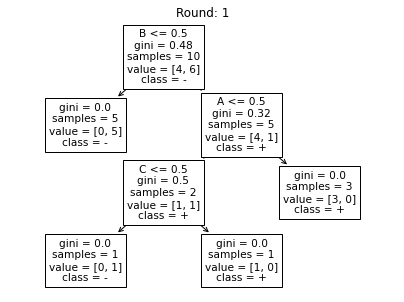

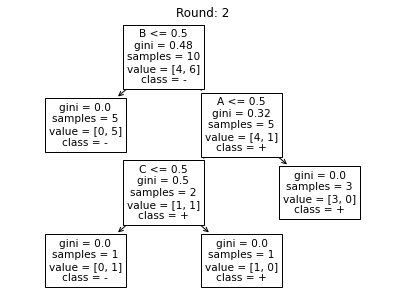

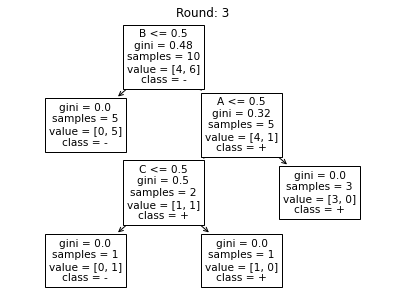

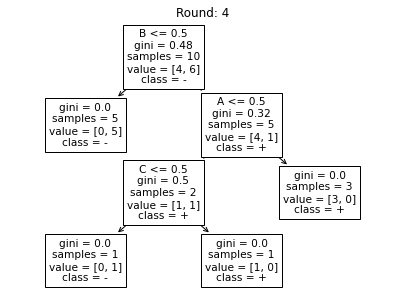

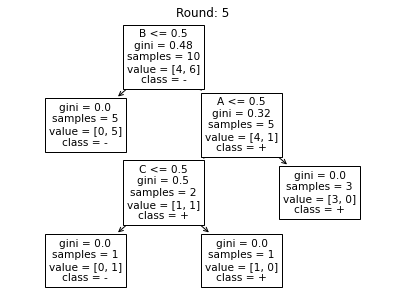

In [16]:
base_models = train_bagging(XTRAIN_numpy, YTRAIN_numpy, 5)

In [17]:
Y_PREDICTIONS = predict_bagging(XVALIDATION_numpy, base_models)
Y_PREDICTIONS

[1, 0, 0, 1, 1]

In [19]:
# Replace predictions with actual class values
np.where(np.array(Y_PREDICTIONS) > 0, '+' , '-' )

array(['+', '-', '-', '+', '+'], dtype='<U1')